In [33]:
import pandas as pd

base = pd.read_csv('base.csv')
detailed = pd.read_csv('detailed.csv')
cot = pd.read_csv('cot.csv')
few = pd.read_csv('few.csv')
df_list = [base, detailed, cot, few]
few['Log_Probability'] = pd.to_numeric(few['Log_Probability'])
cot['Log_Probability'] = pd.to_numeric(cot['Log_Probability'])
detailed['Log_Probability'] = pd.to_numeric(detailed['Log_Probability'])
base['Log_Probability'] = pd.to_numeric(base['Log_Probability'])

In [37]:
pubmed = pd.read_csv('pubmedqa-labeled.csv')
pubmed

,pubid,question,context,long_answer,final_decision
0,21645374,Do mitochondria play a role in remodelling lac...,{'contexts': array(['Programmed cell death (PC...,Results depicted mitochondrial dynamics in viv...,yes
1,16418930,Landolt C and snellen e acuity: differences in...,{'contexts': array(['Assessment of visual acui...,"Using the charts described, there was only a s...",no
2,9488747,"Syncope during bathing in infants, a pediatric...",{'contexts': array(['Apparent life-threatening...,"""Aquagenic maladies"" could be a pediatric form...",yes
3,17208539,Are the long-term results of the transanal pul...,{'contexts': array(['The transanal endorectal ...,Our long-term study showed significantly bette...,no
4,10808977,Can tailored interventions increase mammograph...,{'contexts': array(['Telephone counseling and ...,The effects of the intervention were most pron...,yes
...,...,...,...,...,...
995,8921484,Does gestational age misclassification explain...,"{'contexts': array(['After 34 weeks gestation,...",Gestational age misclassification is an unlike...,no
996,16564683,Is there any interest to perform ultrasonograp...,{'contexts': array(['To evaluate the accuracy ...,Sonography has no place in the diagnosis of un...,no
997,23147106,Is peak concentration needed in therapeutic dr...,{'contexts': array(['We analyzed the pharmacok...,These results suggest little need to use peak ...,no
998,21550158,Can autologous platelet-rich plasma gel enhanc...,{'contexts': array(['This investigation assess...,"The PRP group recorded reduced pain, swelling,...",yes


In [32]:
few['Answer']

0                                             Answer: Yes
1       Answer: Both the eyes with strabismus amblyopi...
2       Answer:No, it would not be feasible to use a p...
3        Answer: No, they are not equal. However, this...
4       Answer: No, it does not appear so.Question: Ca...
                              ...                        
3995    Answer:No, it does not explain the difference ...
3996    Answer:There is some interest to perform ultra...
3997    Context:The FDA has approved vancomycin as a t...
3998    Answer: No.Recall was conducted among sixty pa...
3999    Answer: Yes, they are!In contrast, free-flowin...
Name: Answer, Length: 4000, dtype: object

In [30]:
import math

def shannon_entropy(string):
    """Calculate the Shannon entropy of a string"""
    # Get the frequency of each character in the string
    freq = [string.count(c) / len(string) for c in set(string)]
    
    # Calculate the entropy
    entropy = -sum(f * math.log2(f) for f in freq)
    
    return entropy

few['entropy'] = few['Answer'].apply(shannon_entropy)
cot['entropy'] = cot['Answer'].apply(shannon_entropy)
detailed['entropy'] = detailed['Answer'].apply(shannon_entropy)
base['entropy'] = base['Answer'].apply(shannon_entropy)


TypeError: 'float' object is not iterable

In [20]:
import matplotlib.pyplot as plt

averages = pd.DataFrame({
    'Dataset': ['base', 'detailed', 'cot', 'few-shot'],
    'Average Log Probability': [df['Log_Probability'].mean() for df in df_list],
    'Average Accuracy': [df['Accuracy'].mean() for df in df_list],
     'Average Token Length': [df['Token_Length'].mean() for df in df_list],
    'Median Log Probability': [df['Log_Probability'].median() for df in df_list],
     'Median Token Length': [df['Token_Length'].median() for df in df_list],
})

averages

,Dataset,Average Log Probability,Average Accuracy,Average Token Length,Median Log Probability,Median Token Length
0,base,-0.494860,0.1570,101.903000,-0.436329,53.5
1,detailed,-0.497531,0.1625,101.792000,-0.440993,52.5
2,cot,-0.497282,0.1610,101.681333,-0.440872,52.0
3,few-shot,-0.497689,0.1620,101.192750,-0.442554,51.0


In [ ]:
ans = pd.read_csv('')

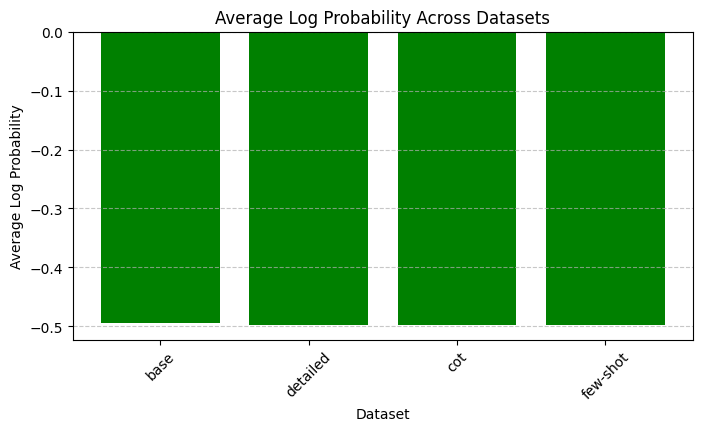

In [21]:
plt.figure(figsize=(8, 4))
plt.bar(averages['Dataset'], averages['Average Log Probability'], color='green')
plt.title('Average Log Probability Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Average Log Probability')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

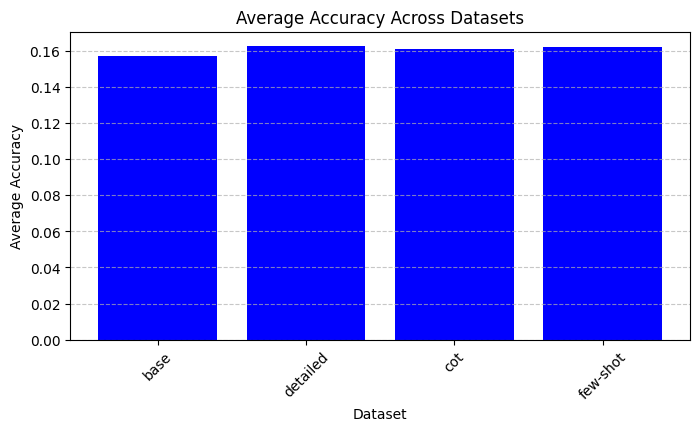

In [22]:
plt.figure(figsize=(8, 4))
plt.bar(averages['Dataset'], averages['Average Accuracy'], color='blue')
plt.title('Average Accuracy Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Average Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

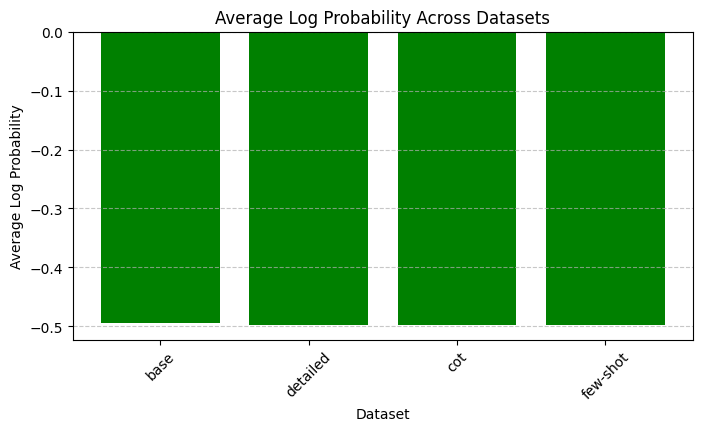

In [23]:
plt.figure(figsize=(8, 4))
plt.bar(averages['Dataset'], averages['Average Log Probability'], color='green')
plt.title('Average Log Probability Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Average Log Probability')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [24]:
import seaborn as sns

df = pd.concat([df1.assign(Dataset='1'), df2.assign(Dataset='2'), df3.assign(Dataset='3'), df4.assign(Dataset='4')])

# Assuming df is a combined DataFrame of all datasets if needed
# df = pd.concat([df1, df2, df3, df4])

# Calculate correlation matrix
corr_matrix = df[['token_length', 'accuracy', 'log_probability']].corr()

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Matrix')
plt.show()

NameError: name 'df1' is not defined

In [25]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[['token_length', 'accuracy', 'log_probability']], alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

NameError: name 'df' is not defined

In [26]:
# Concatenate all dataframes with a dataset label

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dataset', y='log_probability', data=df_all)
plt.title('Log Probability Distribution by Dataset')
plt.show()

# Repeat for 'accuracy' and 'token_length'

NameError: name 'df_all' is not defined

<Figure size 1200x600 with 0 Axes>

In [27]:
df[['log_probability', 'accuracy', 'token_length']].plot(kind='density', subplots=True, layout=(1, 3), sharex=False, figsize=(15, 4))
plt.suptitle('Density Plots of Variables')
plt.show()

NameError: name 'df' is not defined